<a href="https://colab.research.google.com/github/JustKeepPlay/PyProject/blob/main/Social_media_clustering_with_K_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os # use commandline
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
live = pd.read_csv(io.BytesIO(uploaded['Live.csv']))
live.head(20)

Saving Live.csv to Live (3).csv


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
live.shape

(7050, 16)

In [ ]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:

live=live.drop(['status_id','status_published','Column1','Column2','Column3','Column4'], axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
live['status_type'] = encoder.fit_transform(live['status_type'])

In [ ]:
live.head(10)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
5,1,217,6,0,211,5,1,0,0,0
6,3,503,614,72,418,70,10,2,0,3
7,3,295,453,53,260,32,1,1,0,1
8,1,203,1,0,198,5,0,0,0,0
9,1,170,9,1,167,3,0,0,0,0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

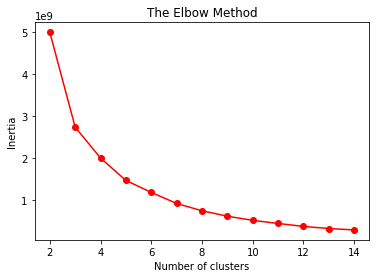

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# points = df.iloc[:, 0:5].values
inertia = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i,  max_iter = 300, random_state = 0)
    kmeans.fit(live)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 15), inertia,'ro-') #ิbx- คือสัญลักษณะของกราฟในแต่ละคลัสเตอร์
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(live) # สร้าง model


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
centers = kmeans.cluster_centers_  #5 clusters and 4 attributes
centers

array([[1.82231405e+00, 1.71315289e+03, 3.17871901e+02, 1.17700413e+02,
        1.65226033e+03, 4.77747934e+01, 9.73347107e+00, 2.60950413e+00,
        4.13223140e-01, 3.61570248e-01],
       [1.66884430e+00, 1.13000000e+02, 1.08951003e+02, 2.47901695e+01,
        1.03412350e+02, 8.33551097e+00, 5.78783637e-01, 4.09706020e-01,
        1.82454503e-01, 7.82392285e-02],
       [2.98540146e+00, 4.86737226e+02, 5.30959124e+03, 4.80408759e+02,
        3.76072993e+02, 9.50729927e+01, 4.80291971e+00, 7.39416058e+00,
        2.51824818e+00, 8.75912409e-01]])

In [ ]:
newcenters = pd.DataFrame(centers)
newcenters.round(0).astype('int')

,0,1,2,3,4,5,6,7,8,9
0,2,1713,318,118,1652,48,10,3,0,0
1,2,113,109,25,103,8,1,0,0,0
2,3,487,5310,480,376,95,5,7,3,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(live)
pca_2d = pca.transform(live)
newdf = pd.DataFrame(pca_2d);
newdf['Cluster'] = kmeans.labels_
newdf

,0,1,Cluster
0,372.670328,308.269645,1
1,-242.585684,-59.785648,1
2,11.501600,-11.721598,1
3,-252.701137,-113.974861,1
4,-227.065467,21.618669,1
...,...,...,...
7045,-258.407290,-144.543135,1
7046,-277.546481,-247.344369,1
7047,-281.063657,-266.108107,1
7048,-176.777883,216.126404,1


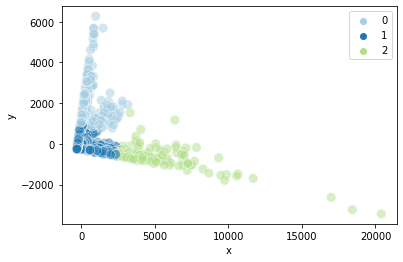

In [ ]:
import seaborn as sns
sns.scatterplot(x=newdf[0], y=newdf[1], hue="Cluster", data=newdf, palette='Paired', s=90, alpha = 0.5,cmap = 'viridis');
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best');

In [ ]:
live.head(100)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,1,23,7,0,20,3,0,0,0,0
96,1,266,25,0,250,11,5,0,0,0
97,3,378,512,30,348,27,2,0,0,1
98,3,421,709,30,373,45,2,0,1,0


In [ ]:
unseen1 = 1,1850,440,162,853,11,2,0,1,0
unseen2 = 1,351,12,82,153,4,3,0,1,0

In [ ]:
US=[unseen1,unseen2]
C_clustered=kmeans.predict(US)
print(C_clustered)

[0 1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
